# Box Office

Kaggle TMDB Box Office Prediction Competition 2019

Authors: Sean Trinh, Hariharan Vijayachandran

Part 1 - Process the data.

In [29]:
def get_data():
    #Get the training and testing data
    return [pd.read_csv('./data/train.csv'), pd.read_csv('./data/test.csv')]

def drop(to_drop, train, test):
    #Drop specified attributes from the training and test data sets
    for x in to_drop:
        try:
            train = train.drop(x, axis = 1)
            if x != 'revenue':
                test = test.drop(x, axis = 1)
        except:
            pass
    return [train, test]

def split_to_validate(train, fraction, random):
    #Split training data into training and validation data
    ret_train = train.sample(frac=fraction, random_state=random)
    ret_test = train.drop(ret_train.index)
    return [ret_train, ret_test]

def ap(x):
    #Convert years (ex: 86 -> 1986, 15 -> 2015)
    if type(x) == str:
        x = int(x.split('/')[2])
        if x<=19:
            return 2000+x
        else:
            return 1900+x
    else:
        return 0

In [30]:
'''
    Process the data.
'''
import pandas as pd

#Get training and test data for all models
train_all, test_all = get_data()
cc_train, cc_test = get_data()
date_train, date_test = get_data()

train_df, test_df = get_data()

# #Train all models on the same training and validation data
training, validation = split_to_validate(train_df, 0.7, 200)

train = training
test = validation
cc_train_s = training
cc_test_s = validation
date_train_s = training
date_test_s = validation

train_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [32]:
#ALL ATTRIBUTES
ALL_ATTRIBUTES = ['id','belongs_to_collection','budget','genres','homepage','imdb_id','original_language',
                 'original_title','overview','popularity','poster_path','production_companies',
                 'production_countries','release_date','runtime','spoken_languages', 'status', 'tagline',
                 'title','Keywords','cast','crew','revenue']

In [33]:
to_drop = ['release_date','id','genres','homepage','original_title','title','original_language','overview',
           'production_companies','production_countries','spoken_languages','status','tagline',
           'belongs_to_collection', 'imdb_id','poster_path','Keywords','cast','crew']
train_df, test_df = drop(to_drop, train_df, test_df) #testing
train, test = drop(to_drop, train, test) #training and validation
train_all, test_all = drop(to_drop, train_all, test_all)

#cc_train, cc_test
to_drop1 = ['budget','runtime','popularity','release_date','id','genres','homepage','original_title',
            'title','original_language','overview','production_companies','production_countries',
            'spoken_languages','status','tagline','belongs_to_collection', 'imdb_id','poster_path','Keywords']
cc_train, cc_test = drop(to_drop1, cc_train, cc_test) #testing
cc_train_s, cc_test_s = drop(to_drop1, cc_train_s, cc_test_s) #training and validation

#Count the number of cast members
cc_train_s['cast'] = cc_train_s['cast'].apply(lambda x: x.count('{') if type(x)==str else 0)
cc_test_s['cast'] = cc_test_s['cast'].apply(lambda x: x.count('{') if type(x)==str else 0)
cc_test['cast'] = cc_test['cast'].apply(lambda x: x.count('{') if type(x)==str else 0)

#Count the number of crew members
cc_train_s['crew'] = cc_train_s['crew'].apply(lambda x: x.count('{') if type(x)==str else 0)
cc_test_s['crew'] = cc_test_s['crew'].apply(lambda x: x.count('{') if type(x)==str else 0)
cc_test['crew'] = cc_test['crew'].apply(lambda x: x.count('{') if type(x)==str else 0)

#on all
cc_train['cast'] = cc_train['cast'].apply(lambda x: x.count('{') if type(x)==str else 0)
cc_train['crew'] = cc_train['crew'].apply(lambda x: x.count('{') if type(x)==str else 0)

#date_train, date_test
to_drop2 = ['budget','runtime','popularity','id','genres','homepage','original_title','title','original_language',
            'overview','production_companies','production_countries','spoken_languages','status','tagline',
            'belongs_to_collection', 'imdb_id','poster_path','Keywords','cast','crew']
date_train, date_test = drop(to_drop2, date_train, date_test) #testing
date_train_s, date_test_s = drop(to_drop2, date_train_s, date_test_s) #training and validation

#Get month and year
date_train_s['release_month'] = date_train_s['release_date'].apply(lambda x:int(x.split('/')[0]) if type(x)==str else 0 )
date_train_s['release_year'] = date_train_s['release_date'].apply(lambda x:int(x.split('/')[2])if type(x)==str else 0 )

date_test_s['release_month'] = date_test_s['release_date'].apply(lambda x:int(x.split('/')[0])if type(x)==str else 0 )
date_test_s['release_year'] = date_test_s['release_date'].apply(lambda x:int(x.split('/')[2]) if type(x)==str else 0)

date_test['release_month'] = date_test['release_date'].apply(lambda x:int(x.split('/')[0])if type(x)==str else 0 )
date_test['release_year'] = date_test['release_date'].apply(lambda x:int(x.split('/')[2]) if type(x)==str else 0)

#Convert year 
date_train_s['release_year'] = date_train_s['release_date'].apply(ap)
date_test_s['release_year'] = date_test_s['release_date'].apply(ap)
date_test['release_year'] = date_test['release_date'].apply(ap)

#Drop the release_date itself
date_train_s.drop('release_date',axis = 1, inplace = True)
date_test_s.drop('release_date',axis = 1, inplace = True)
date_test.drop('release_date',axis = 1, inplace = True)

#on all
date_train['release_month'] = date_train['release_date'].apply(lambda x:int(x.split('/')[0]) if type(x)==str else 0 )
date_train['release_year'] = date_train['release_date'].apply(lambda x:int(x.split('/')[2]) if type(x)==str else 0 )
date_train['release_year'] = date_train['release_date'].apply(ap)
date_train.drop('release_date', axis = 1, inplace = True)


In [34]:
train_all.head()

,budget,popularity,runtime,revenue
0,14000000,6.575393,93.0,12314651
1,40000000,8.248895,113.0,95149435
2,3300000,64.299990,105.0,13092000
3,1200000,3.174936,122.0,16000000
4,0,1.148070,118.0,3923970


In [35]:
cc_train.head()

,cast,crew,revenue
0,24,72,12314651
1,20,9,95149435
2,51,64,13092000
3,7,3,16000000
4,4,2,3923970


In [36]:
date_train.head()

,revenue,release_month,release_year
0,12314651,2,2015
1,95149435,8,2004
2,13092000,10,2014
3,16000000,3,2012
4,3923970,2,2009


In [37]:
#Print Lengths of training and validation data sets
print(len(train))
print(len(test))
print(len(cc_train_s))
print(len(cc_test_s))
print(len(date_train_s))
print(len(date_test_s))

2100
900
2100
900
2100
900


In [38]:
import numpy as np
def f(x):
    if x<0:
        return 0
    return x

#Model 1
train = train.apply(np.log)
train = train.applymap(f)
train = train.fillna(0)
X = train.drop('revenue', axis = 1)
Y = train['revenue']

#for all
train_all = train_all.apply(np.log)
train_all = train_all.applymap(f)
train_all = train_all.fillna(0)
X_0 = train_all.drop('revenue', axis = 1)
Y_0 = train_all['revenue']

test = test.apply(np.log)
test = test.applymap(f)
test = test.fillna(0)
X_test =test.drop('revenue',axis = 1)
Y_test = test['revenue']

#Model 2
cc_train_s['revenue'] = cc_train_s['revenue'].apply(np.log)
cc_train_s = cc_train_s.applymap(f)
cc_train_s = cc_train_s.fillna(0)
X1 = cc_train_s.drop('revenue',axis = 1)
Y1 = cc_train_s['revenue']

#for all
cc_train['revenue'] = cc_train['revenue'].apply(np.log)
cc_train = cc_train.applymap(f)
cc_train = cc_train.fillna(0)
X_0_1 = cc_train.drop('revenue',axis = 1)
Y_0_1 = cc_train['revenue']

cc_test_s['revenue'] = cc_test_s['revenue'].apply(np.log)
cc_test_s = cc_test_s.applymap(f)
cc_test_s = cc_test_s.fillna(0)
X1_test = cc_test_s.drop('revenue', axis = 1)
Y1_test = cc_test_s['revenue']

#Model 3
date_train_s['revenue'] = date_train_s['revenue'].apply(np.log)
date_train_s = date_train_s.applymap(f)
date_train_s = date_train_s.fillna(0)
X2 = date_train_s.drop('revenue', axis = 1)
Y2 = date_train_s['revenue']

#for all
date_train['revenue'] = date_train['revenue'].apply(np.log)
date_train = date_train.applymap(f)
date_train = date_train.fillna(0)
X_0_2 = date_train.drop('revenue', axis = 1)
Y_0_2 = date_train['revenue']

date_test_s['revenue'] = date_test_s['revenue'].apply(np.log)
date_test_s = date_test_s.applymap(f)
date_test_s = date_test_s.fillna(0)
X2_test = date_test_s.drop('revenue', axis = 1)
Y2_test = date_test_s['revenue']

#Model 1
train.head()

,budget,popularity,runtime,revenue
2585,0.000000,1.657191,4.418841,14.156419
2611,0.000000,2.818963,4.672829,18.251453
219,14.771022,0.790251,4.653960,14.967980
2204,17.504390,2.382268,4.691348,17.153756
251,18.400478,1.985746,4.779123,16.119826


In [39]:
cc_train.head()

,cast,crew,revenue
0,24,72,16.326300
1,20,9,18.370959
2,51,64,16.387512
3,7,3,16.588099
4,4,2,15.182614


In [40]:
date_train.head()

,revenue,release_month,release_year
0,16.326300,2,2015
1,18.370959,8,2004
2,16.387512,10,2014
3,16.588099,3,2012
4,15.182614,2,2009


In [41]:
from keras import models, layers, regularizers, optimizers
def model1(X, Y, X_test, Y_test):
    model1 = models.Sequential()
    model1.add(layers.Dense(356, activation='relu', input_shape=(X.shape[1],)))
    model1.add(layers.Dropout(0.1))
    model1.add(layers.Dense(256, activation='relu'))
    model1.add(layers.Dense(10,activation='relu'))
    model1.add(layers.Dense(1))
    
    model1.compile(optimizer=optimizers.rmsprop(lr=1e-5),loss='mse',metrics=['mean_squared_logarithmic_error'])
    history = model1.fit(X,Y,epochs=40, batch_size = 32, validation_data=(X_test, Y_test))
    #history = model1.fit(X, Y, epochs = 40, batch_size = 32)
    return [model1, history]

In [42]:
def model2(X1, Y1, X1_test, Y1_test): 
    model2 = models.Sequential()
    model2.add(layers.Dense(356, activation='relu', input_shape=(X1.shape[1],)))
    model2.add(layers.Dropout(0.2))
    model2.add(layers.BatchNormalization())
    model2.add(layers.Dense(256, activation='relu'))
    model2.add(layers.Dropout(0.2))
    model2.add(layers.Dense(128, activation='relu'))
    model2.add(layers.Dropout(0.2))
    model2.add(layers.Dense(10,activation='relu'))
    model2.add(layers.Dense(1))

    model2.compile(optimizer=optimizers.rmsprop(lr=1e-5),loss='mse',metrics=['mean_squared_logarithmic_error'])
    history = model2.fit(X1, Y1, epochs=50, batch_size = 32, validation_data=(X1_test, Y1_test))
    #history = model2.fit(X1, Y1, epochs = 50, batch_size = 32)
    return [model2, history]

In [43]:
def model3(X2, Y2, X2_test, Y2_test):
    model3 = models.Sequential()
    model3.add(layers.Dense(356, activation='relu', input_shape=(X2.shape[1],)))
    model3.add(layers.Dropout(0.2))
    model3.add(layers.Dense(256, activation='relu'))
    model3.add(layers.Dense(10,activation='relu'))
    model3.add(layers.Dense(1))

    model3.compile(optimizer=optimizers.rmsprop(lr=1e-5),loss='mse',metrics=['mean_squared_logarithmic_error'])
    history = model3.fit(X2, Y2, epochs=40, batch_size = 32, validation_data=(X2_test, Y2_test))
    #history = model3.fit(X2, Y2, epochs = 50, batch_size = 32)
    
    return [model3, history]
    

MODEL 1 - BUDGET, RUNTIME, AND POPULARITY

In [44]:
model1, history1 = model1(X, Y, X_test, Y_test)
model1.summary()

Train on 2100 samples, validate on 900 samples
Epoch 1/40
2100/2100 [==============================] - 1s 283us/step - loss: 284.1947 - mean_squared_logarithmic_error: 7.8854 - val_loss: 264.0805 - val_mean_squared_logarithmic_error: 7.7527
Epoch 2/40
2100/2100 [==============================] - 0s 76us/step - loss: 255.0887 - mean_squared_logarithmic_error: 6.6288 - val_loss: 242.6965 - val_mean_squared_logarithmic_error: 5.3271
Epoch 3/40
2100/2100 [==============================] - 0s 72us/step - loss: 236.9173 - mean_squared_logarithmic_error: 4.9890 - val_loss: 229.1502 - val_mean_squared_logarithmic_error: 4.3863
Epoch 4/40
2100/2100 [==============================] - 0s 75us/step - loss: 221.8902 - mean_squared_logarithmic_error: 4.0530 - val_loss: 214.7821 - val_mean_squared_logarithmic_error: 3.6429
Epoch 5/40
2100/2100 [==============================] - 0s 73us/step - loss: 206.6600 - mean_squared_logarithmic_error: 3.3472 - val_loss: 198.5386 - val_mean_squared_logarithmic_e

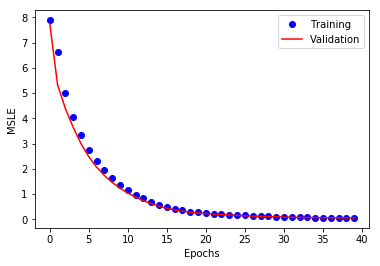

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history1.history['mean_squared_logarithmic_error']
val_acc = history1.history['val_mean_squared_logarithmic_error']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MSLE')
plt.legend()
plt.show()

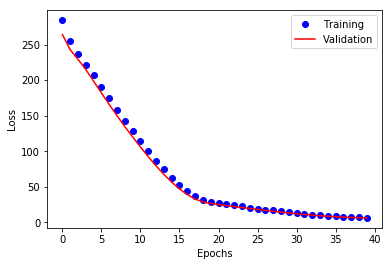

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

l1 = history1.history['loss']
l2 = history1.history['val_loss']

epochs = range(len(l1))

plt.plot(epochs, l1, 'bo', label='Training')
plt.plot(epochs, l2, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

MODEL 2 - NUMBER OF CREW AND NUMBER OF CAST

In [47]:
model2, history2 = model2(X1, Y1, X1_test, Y1_test)
model2.summary()

Train on 2100 samples, validate on 900 samples
Epoch 1/50
2100/2100 [==============================] - 1s 494us/step - loss: 284.2953 - mean_squared_logarithmic_error: 7.9130 - val_loss: 270.8528 - val_mean_squared_logarithmic_error: 7.9390
Epoch 2/50
2100/2100 [==============================] - 0s 106us/step - loss: 273.6637 - mean_squared_logarithmic_error: 7.7585 - val_loss: 262.3462 - val_mean_squared_logarithmic_error: 7.4679
Epoch 3/50
2100/2100 [==============================] - 0s 105us/step - loss: 264.4383 - mean_squared_logarithmic_error: 7.3397 - val_loss: 255.4545 - val_mean_squared_logarithmic_error: 6.6444
Epoch 4/50
2100/2100 [==============================] - 0s 105us/step - loss: 256.9084 - mean_squared_logarithmic_error: 6.7704 - val_loss: 249.8544 - val_mean_squared_logarithmic_error: 6.0796
Epoch 5/50
2100/2100 [==============================] - 0s 105us/step - loss: 248.7618 - mean_squared_logarithmic_error: 6.1111 - val_loss: 243.6590 - val_mean_squared_logarithm

2100/2100 [==============================] - 0s 116us/step - loss: 30.5997 - mean_squared_logarithmic_error: 0.1597 - val_loss: 34.9223 - val_mean_squared_logarithmic_error: 0.1818
Epoch 44/50
2100/2100 [==============================] - 0s 106us/step - loss: 28.3683 - mean_squared_logarithmic_error: 0.1474 - val_loss: 33.4323 - val_mean_squared_logarithmic_error: 0.1724
Epoch 45/50
2100/2100 [==============================] - 0s 109us/step - loss: 27.2251 - mean_squared_logarithmic_error: 0.1391 - val_loss: 31.9091 - val_mean_squared_logarithmic_error: 0.1642
Epoch 46/50
2100/2100 [==============================] - 0s 107us/step - loss: 27.3195 - mean_squared_logarithmic_error: 0.1414 - val_loss: 30.5228 - val_mean_squared_logarithmic_error: 0.1568
Epoch 47/50
2100/2100 [==============================] - 0s 106us/step - loss: 25.4791 - mean_squared_logarithmic_error: 0.1318 - val_loss: 29.1209 - val_mean_squared_logarithmic_error: 0.1495
Epoch 48/50
2100/2100 [========================

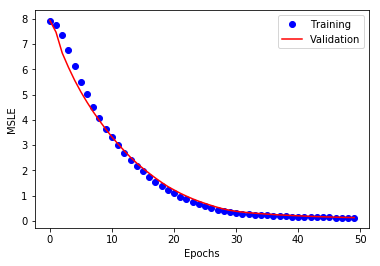

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history2.history['mean_squared_logarithmic_error']
val_acc = history2.history['val_mean_squared_logarithmic_error']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MSLE')
plt.legend()
plt.show()

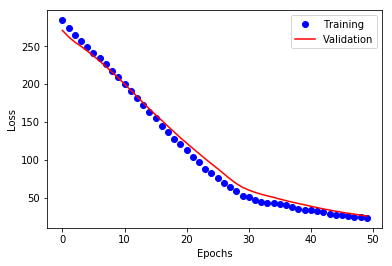

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

l1 = history2.history['loss']
l2 = history2.history['val_loss']

epochs = range(len(l1))

plt.plot(epochs, l1, 'bo', label='Training')
plt.plot(epochs, l2, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

MODEL 3 - RELEASE YEAR AND RELEASE MONTH

In [50]:
model3, history3 = model3(X2, Y2, X2_test, Y2_test)
model3.summary()

Train on 2100 samples, validate on 900 samples
Epoch 1/40
2100/2100 [==============================] - 1s 368us/step - loss: 6478.7880 - mean_squared_logarithmic_error: 2.7879 - val_loss: 290.7478 - val_mean_squared_logarithmic_error: 0.5836
Epoch 2/40
2100/2100 [==============================] - 0s 80us/step - loss: 761.8593 - mean_squared_logarithmic_error: 1.5609 - val_loss: 115.2781 - val_mean_squared_logarithmic_error: 0.8893
Epoch 3/40
2100/2100 [==============================] - 0s 87us/step - loss: 175.0481 - mean_squared_logarithmic_error: 1.2205 - val_loss: 53.9301 - val_mean_squared_logarithmic_error: 0.2950
Epoch 4/40
2100/2100 [==============================] - 0s 77us/step - loss: 80.5684 - mean_squared_logarithmic_error: 0.5509 - val_loss: 14.9615 - val_mean_squared_logarithmic_error: 0.0878
Epoch 5/40
2100/2100 [==============================] - 0s 72us/step - loss: 44.6568 - mean_squared_logarithmic_error: 0.2371 - val_loss: 13.6110 - val_mean_squared_logarithmic_error

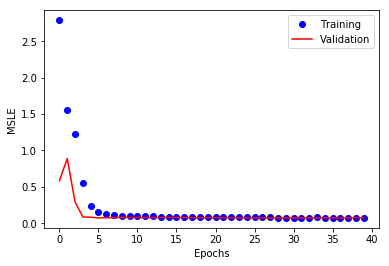

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history3.history['mean_squared_logarithmic_error']
val_acc = history3.history['val_mean_squared_logarithmic_error']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MSLE')
plt.legend()
plt.show()

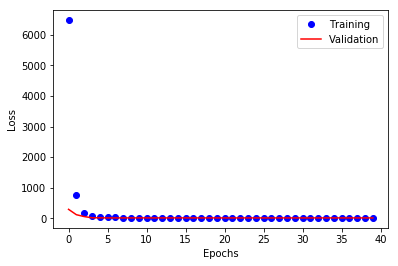

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

l1 = history3.history['loss']
l2 = history3.history['val_loss']

epochs = range(len(l1))

plt.plot(epochs, l1, 'bo', label='Training')
plt.plot(epochs, l2, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

MODEL 4 - TITLE

In [78]:
train_df_1 = pd.read_csv('./data/train.csv')
test_df_1 = pd.read_csv('./data/test.csv')

title_rev = train_df_1[['title','revenue']]
title_rev_test = test_df_1['title']
title_rev.head()

,title,revenue
0,Hot Tub Time Machine 2,12314651
1,The Princess Diaries 2: Royal Engagement,95149435
2,Whiplash,13092000
3,Kahaani,16000000
4,Marine Boy,3923970


In [79]:
title_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
title      3000 non-null object
revenue    3000 non-null int64
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [80]:
title_rev_test.head()

0    Pokémon: The Rise of Darkrai
1     Attack of the 50 Foot Woman
2                Addicted to Love
3                       Incendies
4              Inside Deep Throat
Name: title, dtype: object

In [81]:
#create_dictionary
dictionary = set()
def make_dict(x):
    global dictionary
    x = str(x).split(" ")
    for i in x:
        dictionary.add(i)

title_rev['title'].apply(make_dict)
title_rev_test.apply(make_dict)

def set_to_dict(s):
    s = list(s)
    dictionary = dict()
    for i in range(len(s)):
        dictionary[(s[i])] = i
    return dictionary

dictionary = set_to_dict(dictionary)

#FOR TEST
# dictionary2 = set()
# for title in title_rev_test:
#     title = str(title).split(" ")
#     for word in title:
#         dictionary2.add(word)
# dictionary2 = set_to_dict(dictionary2)

In [82]:
word_vec = []
def create_word_vec(x):
    global word_vec
    global dictionary
    x = x.split(" ")
    vec = [0.0]*50
    for i in range(len(x)):
        if x[i] in dictionary:
            vec[i]=dictionary[x[i]]
    word_vec.append(vec)

title_rev['title'].apply(create_word_vec)
word_vec = np.array(word_vec)

#FOR TEST
word_vec2 = []
for title in title_rev_test:
    global dictionary
    title = str(title).split(" ")
    vec = [0.0]*50
    for i in range(len(x)):
        if x[i] in dictionary:
            vec[i] = dictionary[x[i]]
    word_vec2.append(vec)
word_vec2 = np.array(word_vec2)

In [83]:
df = pd.DataFrame({"title":list(word_vec)})
df['revenue']  = title_rev['revenue']

df_test = pd.DataFrame({"title":list(word_vec2)})

In [84]:
from keras import models, layers, regularizers, optimizers
def create_embedding_model():
    model = models.Sequential()
    model.add(layers.Embedding(len(dictionary),30, input_length = 50));
    model.add(layers.Flatten())
    # model.add(layers.Dense(256,activation = 'relu'))
    # model.add(layers.Dropout(0.7))
    model.add(layers.Dense(128,activation = 'relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64,activation = 'relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1))
    history = model.compile(optimizer='adam',loss='mean_squared_logarithmic_error',metrics=['mean_squared_logarithmic_error'])
    return model
def perform_k_fold(model_func, data, y_label, epochs, batch_size,x_label, k = 10,IsSeries = False):
    data = data.sample(frac=1)
    train_x = data.drop(y_label,axis = 1)
    train_y = data[y_label]
    split_value = int(data.shape[0]/k)
    split_index = 0
    metric_list = []
    loss_list = []
    for i in range(k):
        valid_x = train_x.iloc[split_index:split_value+split_index]
        valid_y = train_y.iloc[split_index:split_value+split_index]
        tr_x = train_x.drop(valid_x.index)
        tr_y = train_y.drop(valid_y.index)
        if IsSeries:
            valid_x = valid_x[x_label]
            tr_x = tr_x[x_label]
            valid_x = np.stack(valid_x.to_numpy(),axis = 0)
            tr_x = np.stack(tr_x.to_numpy(),axis = 0)
       
        model = model_func()
        model.fit(tr_x,tr_y,epochs=epochs,batch_size = batch_size)
        loss, metric = model.evaluate(tr_x,tr_y)
        metric_list.append(metric)
        loss_list.append(loss)
    print("Average Loss: ",sum(loss_list)/len(loss_list)," Average metric",sum(metric_list)/len(metric_list))

In [85]:
model4, history4 = create_embedding_model()
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 30)            210210    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1500)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               192128    
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 65        
Total para

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history4.history['mean_squared_logarithmic_error']
val_acc = history4.history['val_mean_squared_logarithmic_error']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MSLE')
plt.legend()
plt.show()

AttributeError: 'NoneType' object has no attribute 'history'

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

l1 = history4.history['loss']
l2 = history4.history['val_loss']

epochs = range(len(l1))

plt.plot(epochs, l1, 'bo', label='Training')
plt.plot(epochs, l2, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print(model4.predict(df))

ENSEMBLE

In [25]:
#MODEL ONE
test_df = test_df.apply(np.log)
test_df = test_df.applymap(f)
test_df = test_df.fillna(0)

test_all = test_all.apply(np.log)
test_all = test_all.applymap(f)
test_all = test_all.fillna(0)
result_X_train_1 = model1.predict(X)
#result_X_train_1 = model1.predict(X_0)
result_X_validation_1 = model1.predict(X_test) #Get prediction

#MODEL TWO
cc_test = cc_test.applymap(f)
cc_test = cc_test.fillna(0)
result_X_train_2 = model2.predict(X1)
#result_X_train_2 = model2.predict(X_0_1)
result_X_validation_2 = model2.predict(X1_test) #Get prediction

#MODEL THREE
date_test = date_test.applymap(f)
date_test = date_test.fillna(0)
result_X_train_3 = model3.predict(X2)
#result_X_train_3 = model3.predict(X_0_2)
result_X_validation_3 = model3.predict(X2_test) #Get prediction

#MODEL FOUR
# train_4, val_4 = split_to_validate(df, 0.7, 200)
# result_X_train_4 = model4.predict(train_4)
# result_X_validation_4 = model4.predict(val_4)


#Create data frames for ensemble model training using predictions from all models
training_data_ensemble = pd.DataFrame({'result1':result_X_train_1.reshape(result_X_train_1.shape[0]),
                                       'result2':result_X_train_2.reshape(result_X_train_2.shape[0]),
                                       'result3':result_X_train_3.reshape(result_X_train_3.shape[0]),
                                       'result4':result_X_train_4.reshape(result_X_train_4.shape[0])})
training_Y_ensemble = Y
#training_Y_ensemble = Y_0

validation_data_ensemble = pd.DataFrame({'result1':result_X_validation_1.reshape(result_X_validation_1.shape[0]),
                                         'result2':result_X_validation_2.reshape(result_X_validation_2.shape[0]),
                                         'result3':result_X_validation_3.reshape(result_X_validation_3.shape[0]),
                                         'result4':result_X_validation_4.reshape(result_X_validation_4.shape[0])})
validation_Y_ensemble = Y_test

#Create the Ensemble model
model_e = models.Sequential()
model_e.add(layers.Dense(356, activation='relu', input_shape=(training_data_ensemble.shape[1],)))
model_e.add(layers.Dropout(0.1))
model_e.add(layers.Dense(256, activation='relu'))
model_e.add(layers.Dense(10,activation='relu'))
model_e.add(layers.Dense(1))    
model_e.compile(optimizer=optimizers.rmsprop(lr=1e-5),loss='mse',metrics=['mean_squared_logarithmic_error'])
history_e = model_e.fit(training_data_ensemble, training_Y_ensemble, epochs=40, batch_size = 32,
                         validation_data=(validation_data_ensemble, validation_Y_ensemble))

#history_e = model_e.fit(training_data_ensemble, training_Y_ensemble, epochs=40, batch_size = 32)



Train on 2100 samples, validate on 900 samples
Epoch 1/40
2100/2100 [==============================] - 1s 273us/step - loss: 191.2089 - mean_squared_logarithmic_error: 2.6373 - val_loss: 162.8586 - val_mean_squared_logarithmic_error: 1.7232
Epoch 2/40
2100/2100 [==============================] - 0s 73us/step - loss: 148.4132 - mean_squared_logarithmic_error: 1.4605 - val_loss: 129.1079 - val_mean_squared_logarithmic_error: 1.0942
Epoch 3/40
2100/2100 [==============================] - 0s 72us/step - loss: 115.6389 - mean_squared_logarithmic_error: 0.9198 - val_loss: 98.8951 - val_mean_squared_logarithmic_error: 0.6983
Epoch 4/40
2100/2100 [==============================] - 0s 75us/step - loss: 85.3884 - mean_squared_logarithmic_error: 0.5684 - val_loss: 70.9035 - val_mean_squared_logarithmic_error: 0.4271
Epoch 5/40
2100/2100 [==============================] - 0s 69us/step - loss: 57.7647 - mean_squared_logarithmic_error: 0.3306 - val_loss: 44.7884 - val_mean_squared_logarithmic_error:

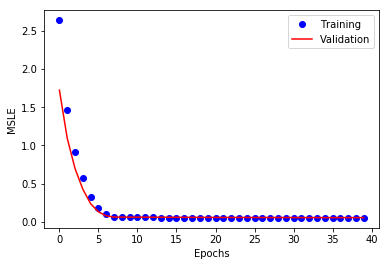

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history_e.history['mean_squared_logarithmic_error']
val_acc = history_e.history['val_mean_squared_logarithmic_error']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MSLE')
plt.legend()
plt.show()

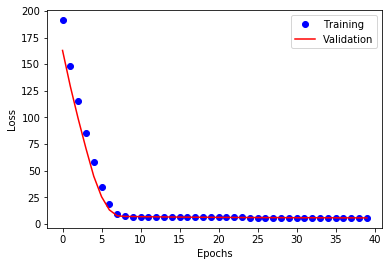

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

l1 = history_e.history['loss']
l2 = history_e.history['val_loss']

epochs = range(len(l1))

plt.plot(epochs, l1, 'bo', label='Training')
plt.plot(epochs, l2, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

GET PREDICTION USING ENSEMBLE METHOD

In [28]:
#Get test predictions
test_m1_prediction = model1.predict(test_df)
#test_m1_prediction = model1.predict(test_all)
test_m2_prediction = model2.predict(cc_test)
test_m3_prediction = model3.predict(date_test)
test_m4_prediction = model4.predict(df_test)
test_data_ensemble = pd.DataFrame({'result1':test_m1_prediction.reshape(test_m1_prediction.shape[0]),
                                   'result2':test_m2_prediction.reshape(test_m2_prediction.shape[0]),
                                   'result3':test_m3_prediction.reshape(test_m3_prediction.shape[0]),
                                   'result4':test_m4_prediction.reshape(test_m4_prediction.shape[0])})
test_ensemble_prediction = model_e.predict(test_data_ensemble)
test_ensemble_prediction = np.exp(test_ensemble_prediction)

#Generate the submission CSV
output_df = pd.read_csv('./data/test.csv')
for x in ALL_ATTRIBUTES:
    try:
        if x != 'revenue'and x != 'id':
            output_df = output_df.drop(x, axis=1)
    except:
        pass

output_df['revenue'] = test_ensemble_prediction
output_df.to_csv("./submission.csv",index = False)